<a href="https://colab.research.google.com/github/zmgy107/DGL-Learning-Notes/blob/main/Chapter_1_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please do not run all codes at once

# Import Packages

In [2]:
# install dgl
%pip install  dgl -f https://data.dgl.ai/wheels/cu117/repo.html
%pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html


import dgl
import torch as th
import scipy.sparse as sp
import networkx as nx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/cu117/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.1 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 KB 52.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# Graphs,Nodes,and Edges

DGL represents each node by a unique integer, called its __node ID__, and each edge by a pair of integers corresponding to the IDs of its end nodes. DGL assigns to each edge a unique integer, called its __edge ID__.

The numbering of node and edge IDs __starts from 0__,__all edges are directed__, and an edge __(u,v)__ indicates that the direction goes from node u to node v.

Node_tensors: node IDs is a __1-D integer tensor__(i.e., PyTorch’s tensor, TensorFlow’s Tensor, or MXNet’s ndarray) .

To specify multiple edges,it ues a __tuple__ of node_tensors (U,V).(U[i],V[i]) decides an edge from U[i] to V[i].

One way to create a DGLGraph is to use the __dg1.graph()__ method,which takes as input a set of edges.DGL also supports creating graphs from other data sources

In [ ]:
# edges 0->1,0->2,0->3,1->3
u,v=th.tensor([0,0,0,1]),th.tensor([1,2,3,3])
g=dgl.graph((u,v))
print(g) # number of nodes are inferred from the max node IDs in the given edges

# Node IDs
print(g.nodes())

# Edge and nodes
print(g.edges())

# Edge and nodes and egde IDs
print(g.edges(form='all'))

# If the node with the largest ID is isolated (meaning no edges),then one needs to explicitly set the number of nodes
g=dgl.graph((u,v),num_nodes=8)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})
tensor([0, 1, 2, 3])
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]))
(tensor([0, 0, 0, 1]), tensor([1, 2, 3, 3]), tensor([0, 1, 2, 3]))


For an undirected graph, use __dgl.to_bidirected()__,which converts a graph into a new one with edges for both directions.

In [ ]:
bg=dgl.to_bidirected(g)
bg.edges() #这条命令居然会自己打印边...

#不会改变原有图
#print(g.edges())

(tensor([0, 0, 0, 1, 1, 2, 3, 3]), tensor([1, 2, 3, 0, 3, 0, 0, 1]))


Note: tensor types are generally preferred throughout DGLAPIs due to their efficient internal storage in C and explicit data type and device context information

DGL can use either 32- or 64-bit integers to store the node and edge IDs. __The data types for the node and edge IDs should be the same__.Using 64-bit,DGL can handle graphs with up to 2^63−1 nodes or edges.However,if a graph contains less than 2^31-1 nodes or edges,one should use 32-bit integers for better speed and less memory.

In [ ]:
edges=th.tensor([2,5,3]),th.tensor([3,5,0]) # edges 2->3,5->5,3->0

g64=dgl.graph(edges) #默认64位
print(g64.idtype)

g32=dgl.graph(edges,idtype=th.int32) # 创建一个32位图
print(g32.idtype)

# 32 64相互转换
g64_2=g32.long()
print(g64_2.idtype)

g32_2=g64.int()
print(g32_2.idtype)

# remark: 当用g32_2.idtype这种方式直接打印时，相同的会合并在一起

torch.int64
torch.int32
torch.int64
torch.int32


# Node and Edge Features

The nodes and edges of a DGLGraph can have several user-defined named features for storing graph-specific properties of the nodes and edges. These features can be accessed via the ndata and edata interface. For example, the following code creates two node features (named 'x' and 'y' in line 8 and 15) and one edge feature (named 'x' in line 9).

In [ ]:
g=dgl.graph(([0,0,1,5],[1,2,2,0])) # 6 nodes,4 edges
print(g)

g.ndata['x']=th.ones(g.num_nodes(),3) # node feature of length 3
g.edata['x']=th.ones(g.num_edges(),dtype=th.int32) #scalar integer feature
print(g)

# different names can have different shapes
g.ndata['y']=th.randn(g.num_nodes(),5)
print(g.ndata['x'][1]) # get node 1's feature
print(g.edata['x'][th.tensor([0,3])]) # get features of edge 0 and 3

Graph(num_nodes=6, num_edges=4,
      ndata_schemes={}
      edata_schemes={})
Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})
tensor([1., 1., 1.])
tensor([1, 1], dtype=torch.int32)


Important facts about the ndata/edata interface:

*  Only features of numerical types (e.g., float, double, and int) are allowed. They can be scalars, vectors or multi-dimensional tensors.

*  Each node feature has a unique name and each edge feature has a unique name. The features of nodes and edges can have the same name. (e.g., ‘x’ in the above example).

*  A feature is created via tensor assignment, which assigns a feature to each node/edge in the graph. The leading dimension of that tensor must be equal to the number of nodes/edges in the graph. You cannot assign a feature to a subset of the nodes/edges in the graph.

*  Features of the same name must have the same dimensionality and data type.

*  The feature tensor is in row-major layout – each row-slice stores the feature of one node or edge

For weighted graphs, one can store the weights as an edge feature as below.

In [ ]:
# edges 0->1,0->2,0->3,1->3
edges=th.tensor([0,0,0,1]),th.tensor([1,2,3,3])
weights=th.tensor([0.1,0.6,0.9,0.7]) # weight of each edge
g=dgl.graph(edges)
g.edata['w']=weights # give it a name 'w'
print(g)

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})


# Creating Graphs from External Sources

The options to construct a DGLGraph from external sources include:

*  Conversion from external python libraries for graphs and sparse matrices (NetworkX and SciPy).

*  Loading graphs from disk.

In [3]:
spmat=sp.rand(100,100,density=0.05) # 5% nonzero entries
sgraph=dgl.from_scipy(spmat) # from Scipy
print(sgraph)

nx_g=nx.path_graph(5) # a chain 0-1-2-3-4
ngraph=dgl.from_networkx(nx_g) # from networkx
print(ngraph)

Graph(num_nodes=100, num_edges=500,
      ndata_schemes={}
      edata_schemes={})
Graph(num_nodes=5, num_edges=8,
      ndata_schemes={}
      edata_schemes={})


nx.path_graph() constructs an undirected NetworkX graph networkx.Graph while a GDLGraph is always directed.So in converting an undirected NetworkX graph into a DGLGraph, DGL internally converts undirected edges to two directed edges.Using directed NetworkX graphs networkx.DiGraph can avoid such behavior.

In [4]:
nxg=nx.DiGraph([(2,1),(1,2),(2,3),(0,0)])
print(dgl.from_networkx(nxg))

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


Note:DGL internally converts SciPy matrices and NetworkX graphs to tensors to construct graphs. Hence, these construction methods are not meant for performance critical parts.

Loading Graphs from Disk

comma separated values(csv):python libaries like numpy.narray.untitles to save/load tensor from disk like torch.save(),torch.load()

JSON/GML Format:NetworkX

DGL Binary Format:DGL provides APIs to save and load graphs from disk stored in binary format. Apart from the graph structure, the APIs also handle feature data and graph-level label data. DGL also supports checkpointing graphs directly to S3 or HDFS. The reference manual provides more details about the usage.

# Heterogeneous Graph

A heterogeneous graph can have nodes and edges of different types. Nodes/Edges of different types have __independent ID space and feature storage__. For example in the figure below, the user and game node IDs both start from zero and they have different features.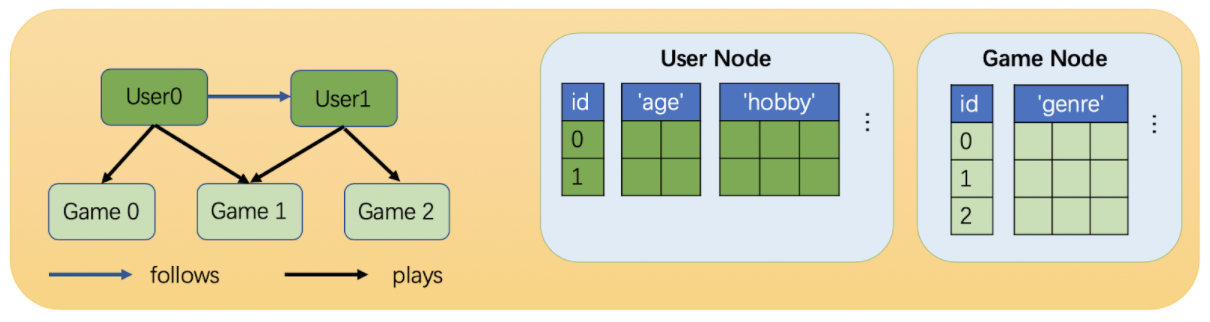

Creating a Heterogeneous Graph

In DGL, a heterogeneous graph (heterograph for short) is specified with a series of graphs as below, one per relation. Each relation is a string triplet __(source node type, edge type, destination node type)__. Since relations disambiguate the edge types, DGL calls them canonical edge types.

In [7]:
# create a heterograph with 3 node types and 3 edges types.
graph_data={
    ('drug','interacts','drug'):(th.tensor([0,1]),th.tensor([1,2])), # 0-1,1-2
    ('drug','interacts','gene'):(th.tensor([0,1]),th.tensor([2,3])), # 0-2,1-3
    ('drug','treats','disease'):(th.tensor([1]),th.tensor([2])) # 1-2
}
g=dgl.heterograph(graph_data)
print(g.ntypes)
print(g.etypes)
print(g.canonical_etypes)

['disease', 'drug', 'gene']
['interacts', 'interacts', 'treats']
[('drug', 'interacts', 'drug'), ('drug', 'interacts', 'gene'), ('drug', 'treats', 'disease')]


Note that homogeneous and bipartite graphs are just special heterogeneous graphs with one relation.

In [9]:
# A homogeneous graph
#dgl.heterograph({('node_type','edge_type','node_type'):(u,v)})
# A bipartite graph
#dgl.heterograph({('source_type','edge_type','destination_type'):(u,v)})

The metagraph associated with a heterogeneous graph is the schema of the graph. It specifies type constraints on the sets of nodes and edges between the nodes. A node u
 in a metagraph corresponds to a node type in the associated heterograph. An edge (u,v)
 in a metagraph indicates that there are edges from nodes of type u
 to nodes of type v
 in the associated heterograph.

In [10]:
print(g)
g.metagraph().edges()

Graph(num_nodes={'disease': 3, 'drug': 3, 'gene': 4},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'interacts', 'gene'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'gene', 'interacts'), ('drug', 'disease', 'treats')])


OutMultiEdgeDataView([('drug', 'drug'), ('drug', 'gene'), ('drug', 'disease')])

Working with Multiple Types

When multiple node/edge types are introduced, users need to specify the particular node/edge type when invoking a DGLGraph API for type-specific information. In addition, nodes/edges of different types have separate IDs.

In [11]:
# Get the number of all nodes in the graph
print(g.num_nodes())
# Get the number of drug nodes
print(g.num_nodes('drug'))

# Nodes of different types have separate IDs,hence not well-defined without a type specified
#print(g.nodes())
print(g.nodes('drug'))

10
3
tensor([0, 1, 2])


To set/get features for a specific node/edge type, DGL provides two new types of syntax – _g.nodes[‘node_type’].data[‘feat_name’] and g.edges[‘edge_type’].data[‘feat_name’]_.

In [13]:
# Set/get feature 'hv' for nodes of type 'drug'
g.nodes['drug'].data['hv']=th.ones(3,1)
print(g.nodes['drug'].data['hv'])

#Set/get feature 'he' for edge of type 'treats'
g.edges['treats'].data['he']=th.zeros(1,1)
print(g.edges['treats'].data['he'])

tensor([[1.],
        [1.],
        [1.]])
tensor([[0.]])


If the graph only has one node/edge type, there is no need to specify the node/edge type.

In [16]:
g=dgl.heterograph({
    ('drug','interacts','drug'):(th.tensor([0,1]),th.tensor([1,2])),
    ('drug','is similar','drug'):(th.tensor([0,1]),th.tensor([2,3]))
})
print(g.nodes())
# To set/get feature with a single type,no need to use the new syntax
g.ndata['hv']=th.ones(4,1)
print(g.nodes['drug'].data['hv'])

tensor([0, 1, 2, 3])
tensor([[1.],
        [1.],
        [1.],
        [1.]])


Note:

When the edge type uniquely determines the types of source and destination nodes, one can just use one string instead of a string triplet to specify the edge type. For example, for a heterograph with two relations ('user', 'plays', 'game') and ('user', 'likes', 'game'), it is safe to just use 'plays' or 'likes' to refer to the two relations.

Loading Heterographs from Disk

CSV

A common way to store a heterograph is to store nodes and edges of different types in different CSV files.An example is as follows.

In [ ]:
# data folder
data/
|-- drug.csv        # drug nodes
|-- gene.csv        # gene nodes
|-- disease.csv     # disease nodes
|-- drug-interact-drug.csv  # drug-drug interaction edges
|-- drug-interact-gene.csv  # drug-gene interaction edges
|-- drug-treat-disease.csv  # drug-treat-disease edges

Similar to the case of homogeneous graphs, one can use packages like Pandas to parse CSV files into numpy arrays or framework tensors, build a relation dictionary and construct a heterograph from that. The approach also applies to other popular formats like GML/JSON.

DGL Binary Format

DGL provides __dgl.save_graphs()__ and __dgl.load_graphs()__ respectively for saving heterogeneous graphs in binary format and loading them from binary format.

Edge Type Subgraph

One can create a subgraph of a heterogeneous graph by specifying the relations to retain, with features copied if any.

In [17]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})
g.nodes['drug'].data['hv'] = th.ones(3, 1)

# Retain relations ('drug', 'interacts', 'drug') and ('drug', 'treats', 'disease')
# All nodes for 'drug' and 'disease' will be retained
eg=dgl.edge_type_subgraph(g,[('drug','interacts','drug'),('drug','treats','disease')])
print(eg)
# The associated features will be copied as well
eg.nodes['drug'].data['hv']

Graph(num_nodes={'disease': 3, 'drug': 3},
      num_edges={('drug', 'interacts', 'drug'): 2, ('drug', 'treats', 'disease'): 1},
      metagraph=[('drug', 'drug', 'interacts'), ('drug', 'disease', 'treats')])


tensor([[1.],
        [1.],
        [1.]])

Converting Heterogeneous Graphs to Homogeneous Graphs

Heterographs provide a clean interface for managing nodes/edges of different types and their associated features. This is particularly helpful when:

*  The features for nodes/edges of different types have different data types or sizes.

*  We want to apply different operations to nodes/edges of different types.

If the above conditions do not hold and one does not want to distinguish node/edge types in modeling, then DGL allows converting a heterogeneous graph to a homogeneous graph with dgl.DGLGraph.to_homogeneous() API. It proceeds as follows:

*  Relabels nodes/edges of all types using consecutive integers starting from 0

*  Merges the features across node/edge types specified by the user.

In [18]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))})
g.nodes['drug'].data['hv']=th.zeros(3,1)
g.nodes['disease'].data['hv']=th.ones(3,1)
g.edges['interacts'].data['he']=th.zeros(2,1)
g.edges['treats'].data['he']=th.zeros(1,2)

# By default,it does not merge any feature
hg=dgl.to_homogeneous(g)
print('hv' in hg.ndata)

# Copy edge features
# For feature copy, it expects features to have
# the same size and dtype across node/edge types
# hg=dgl.to_homogeneous(g,edata=['he'])

# copy node features
hg=dgl.to_homogeneous(g,ndata=['hv'])
print(hg.ndata['hv'])

False
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])


The original node/edge types and type-specific IDs are stored in ndata and edata.

In [20]:
# Order of node types in the heterograph
print(g.ntypes)
# Original node types
print(hg.ndata[dgl.NTYPE])
# Original type-specific node IDs
print(hg.ndata[dgl.NID])

# Order of edge types in the heterograph
print(g.etypes)
# Original edge types
print(hg.edata[dgl.ETYPE])
# Original type-specific edge IDs
print(hg.edata[dgl.EID])

['disease', 'drug']
tensor([0, 0, 0, 1, 1, 1])
tensor([0, 1, 2, 0, 1, 2])
['interacts', 'treats']
tensor([0, 0, 1])
tensor([0, 1, 0])


For modeling purposes, one may want to group some relations together and apply the same operation to them. To address this need, one can first take an edge type subgraph of the heterograph and then convert the subgraph to a homogeneous graph.

In [21]:
g = dgl.heterograph({
   ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
   ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
   ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})
sub_g = dgl.edge_type_subgraph(g, [('drug', 'interacts', 'drug'),('drug', 'interacts', 'gene')])
h_sub_g = dgl.to_homogeneous(sub_g)
h_sub_g

Graph(num_nodes=7, num_edges=4,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})

# Using DGLGraph on a GPU

One can create a DGLGraph on a GPU by passing two GPU tensors during construction. Another approach is to use the to() API to copy a DGLGraph to a GPU, which copies the graph structure as well as the feature data to the given device.

In [3]:
u,v=th.tensor([0,1,2]),th.tensor([2,3,4])
g=dgl.graph((u,v))
g.ndata['x']=th.randn(5,3) # original feature is on CPU
print(g.device)
cuda_g=g.to('cuda:0') # accepts any device objects from backend framework
print(cuda_g.device)
print(cuda_g.ndata['x'].device) # feature data is copied to GPU too

cpu
cuda:0
cuda:0


In [4]:
# A graph constructed from GPU tensors is also on GPU
u, v = u.to('cuda:0'), v.to('cuda:0')
g = dgl.graph((u, v))
g.device

device(type='cuda', index=0)

Any operations involving a GPU graph are performed on a GPU. Thus, they require all tensor arguments to be placed on GPU already and the results (graph or tensor) will be on GPU too. Furthermore, a GPU graph only accepts feature data on a GPU.

In [6]:
cuda_g.in_degrees()
cuda_g.in_edges([2, 3, 4])   # ok for non-tensor type arguments
cuda_g.in_edges(th.tensor([2, 3, 4]).to('cuda:0'))  # tensor type must be on GPU
# cuda_g.ndata['h'] = th.randn(5, 4)  # ERROR! feature must be on GPU too!

(tensor([0, 1, 2], device='cuda:0'), tensor([2, 3, 4], device='cuda:0'))